In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\house-prices-advanced-regression-techniques\train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.drop('Id',axis=1,inplace=True)

In [6]:
def nullvalue(df):
    nullvaluetable=df.isna().sum()/df.shape[0]*100
    print('The total columns are',len(nullvaluetable))
    drop_cols=nullvaluetable[nullvaluetable>30].index
    print('The columns to be dropped is',len(drop_cols))
    print(drop_cols)#As thsi features have high missing values, lets delete the features, otherwise replacing them makes results skewed.
    df.drop(df[drop_cols],axis=1,inplace=True)
    print('The columns after dropping the drop_cols are',len(df.columns))
    retained_cols=nullvaluetable[nullvaluetable<30].index
    print('The columns to be retained is',len(retained_cols))
    features_with_nan=[feature for feature in df.columns if df[feature].isna().sum()>1]
    print('The columns to be with na are',len(features_with_nan))
    numerical=[feature for feature in df if df[feature].dtypes!='O']
    print('The numerical columns are', len(numerical))
    cat=[feature for feature in df if df[feature].dtypes=='O']
    print('The cat columns are',len(cat))
    year_feature=[feature for feature in numerical if 'Yr' in feature or'Year' in feature]
    print('The year columns are',len(year_feature))
    #Lets check continous and discrete variables in numerical variables
    discrete=[feature for feature in numerical if len(df[feature].unique())<25 and feature not in year_feature]
    print('The discrete number of columns are',len(discrete))
    continous=[feature for feature in numerical if feature not in discrete+year_feature]
    print('The discrete number of columns are',len(continous))
    return df,cat,numerical,year_feature,discrete,continous,features_with_nan

In [7]:
df,cat,numerical,year_feature,discrete,continous,features_with_nan=nullvalue(df)

The total columns are 80
The columns to be dropped is 5
Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
The columns after dropping the drop_cols are 75
The columns to be retained is 75
The columns to be with na are 13
The numerical columns are 37
The cat columns are 38
The year columns are 4
The discrete number of columns are 17
The discrete number of columns are 16


In [8]:
df[year_feature].head(3)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008


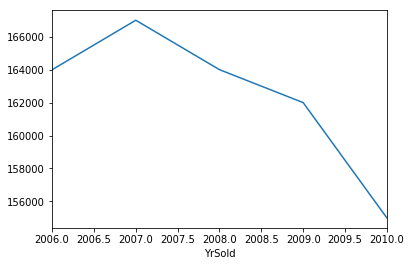

In [9]:
df.groupby('YrSold')['SalePrice'].median().plot()

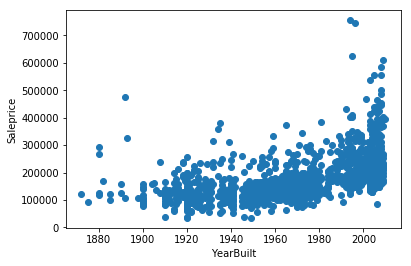

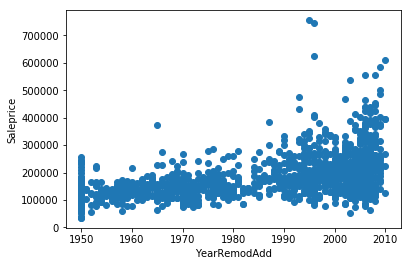

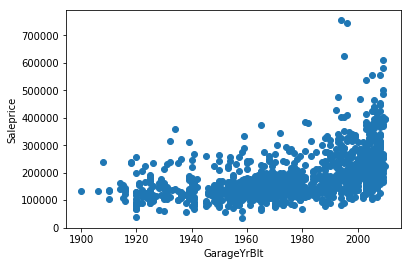

In [10]:
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Saleprice')
        plt.show()

In [11]:
features_with_nan

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

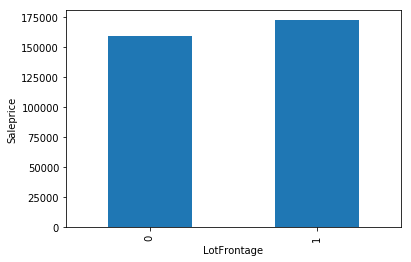

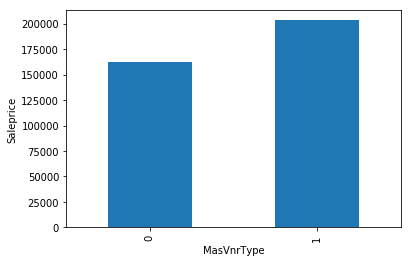

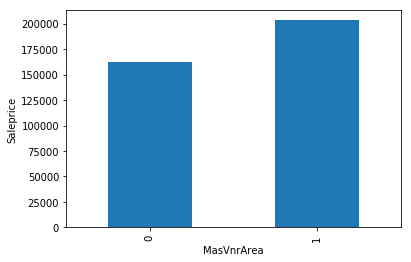

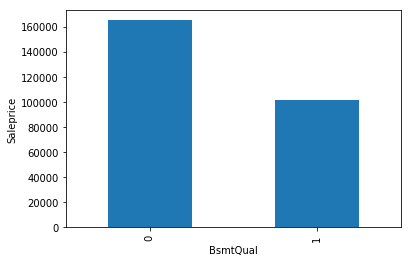

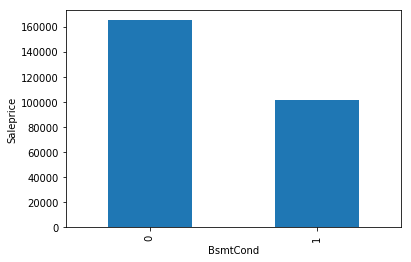

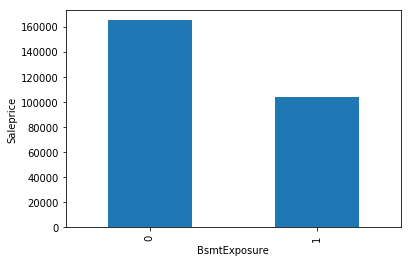

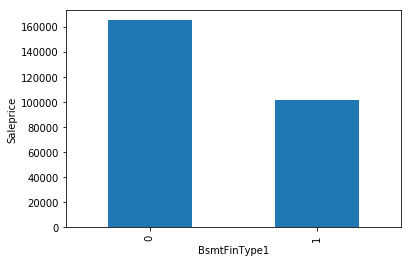

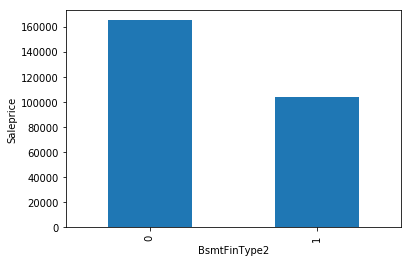

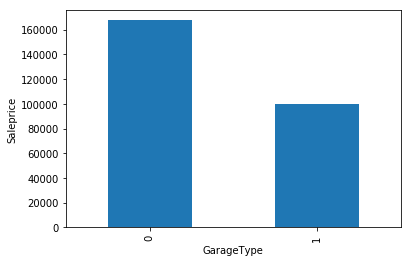

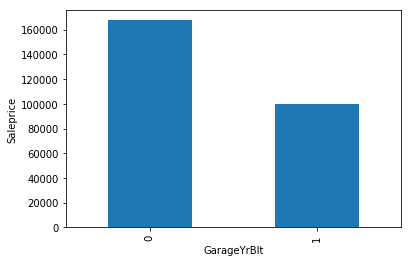

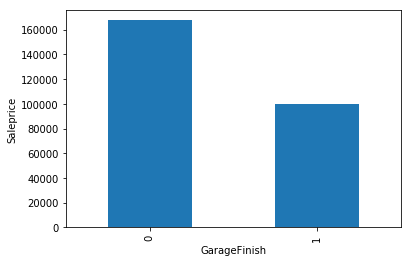

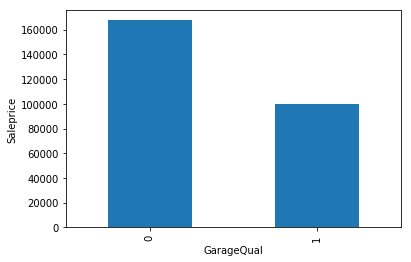

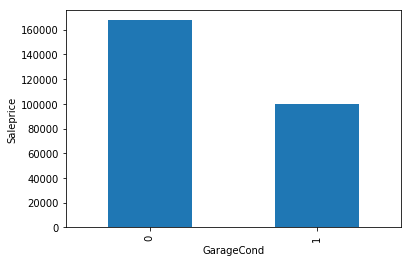

In [12]:
for feature in features_with_nan:
    data=df.copy()
    data[feature]=np.where(df[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Saleprice')
    plt.show()

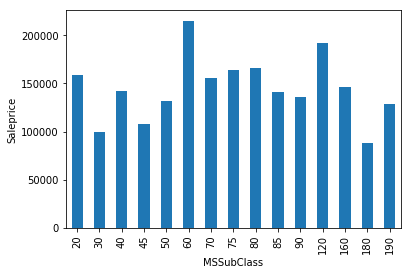

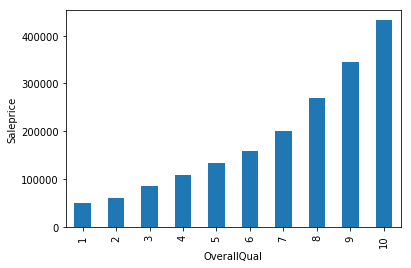

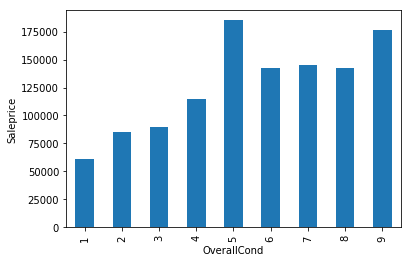

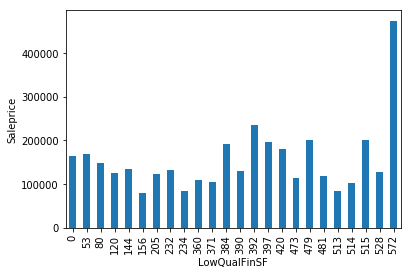

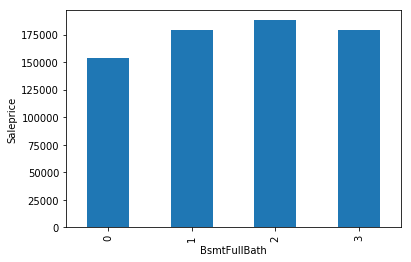

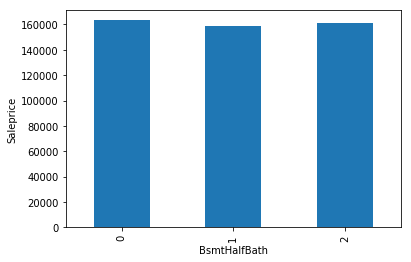

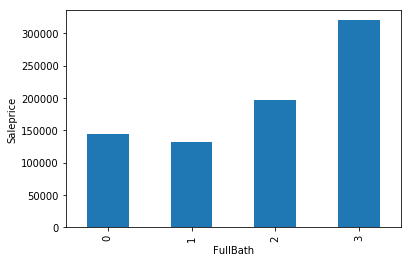

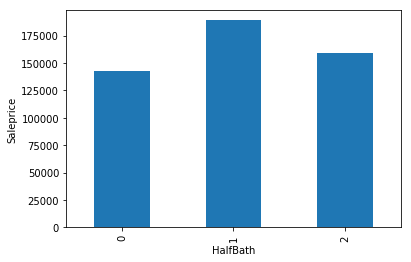

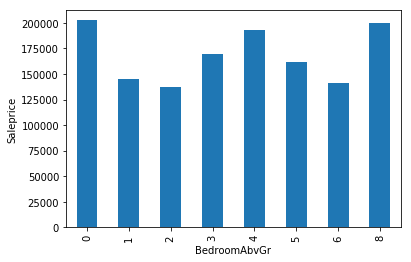

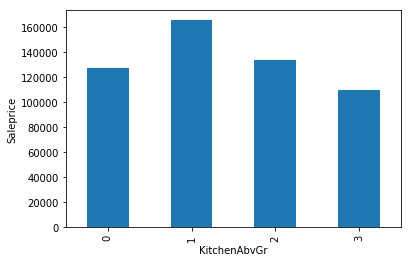

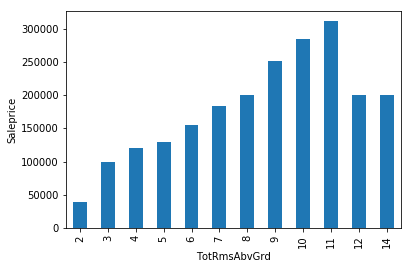

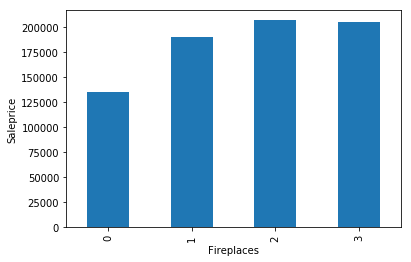

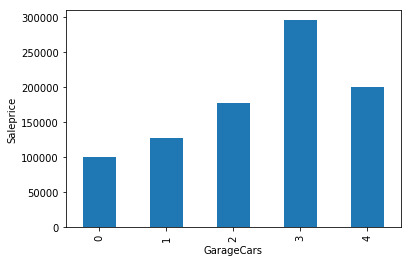

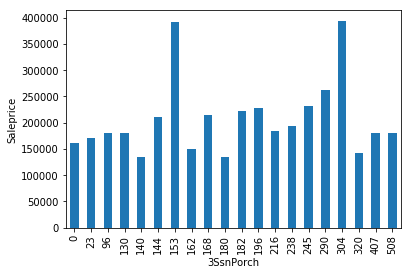

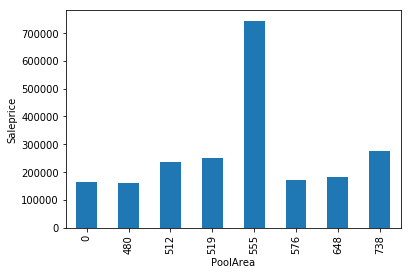

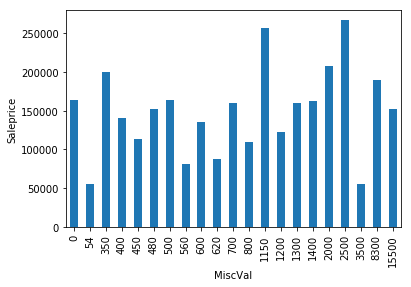

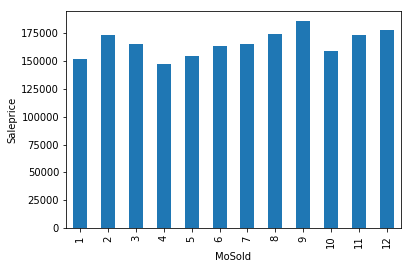

In [13]:
#Lets find relation between discrete variables and saleprice
for feature in discrete:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Saleprice')
    plt.show()

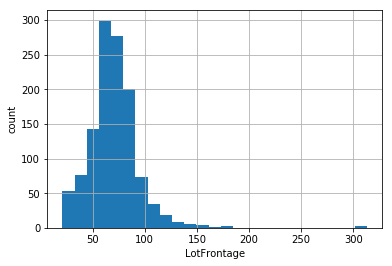

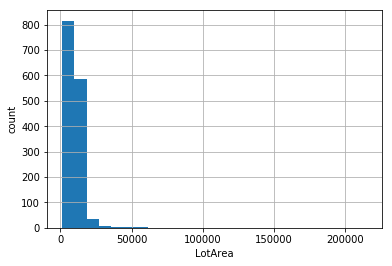

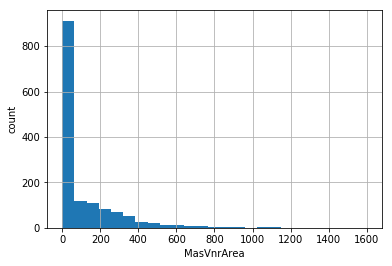

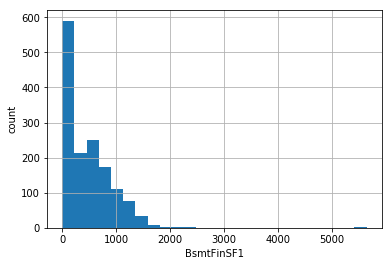

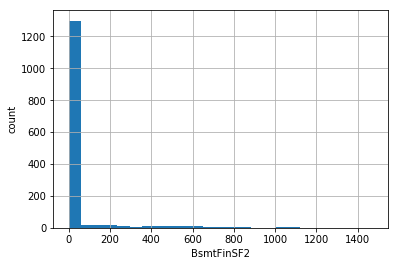

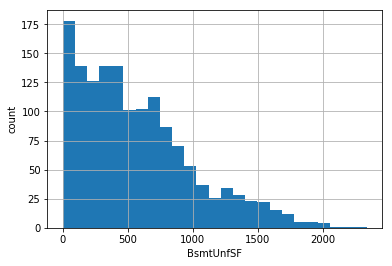

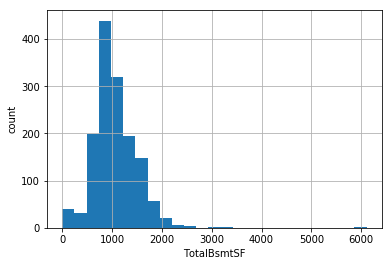

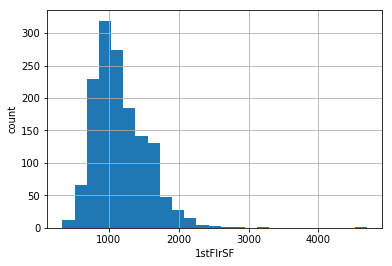

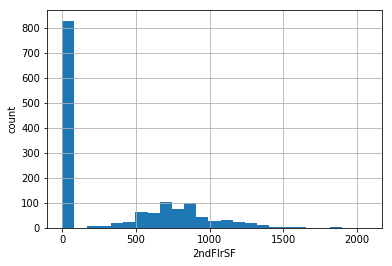

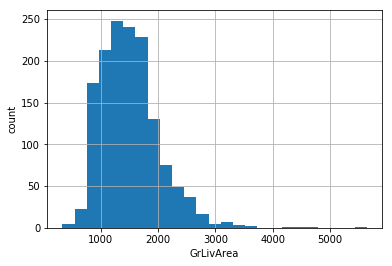

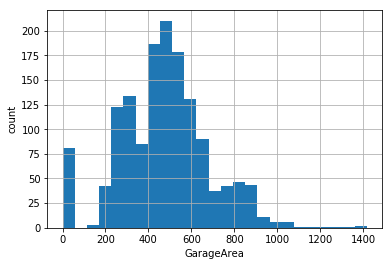

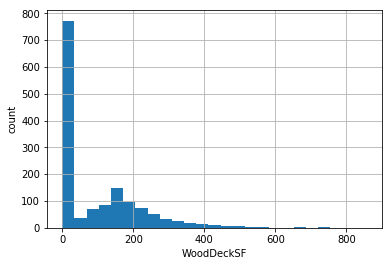

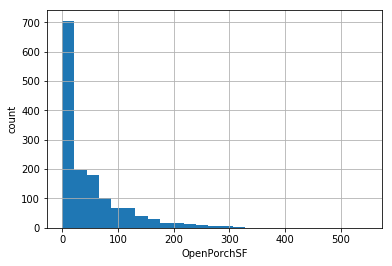

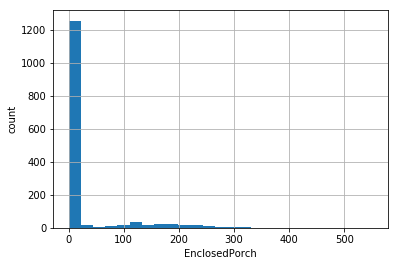

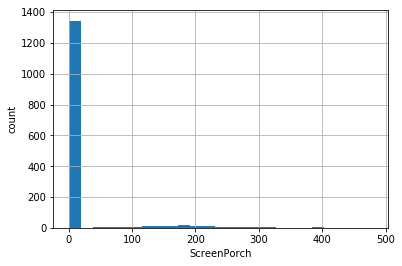

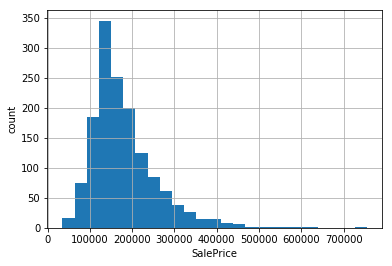

In [14]:
#Lets understand the distribution of each continous variables.
for feature in continous:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

In [15]:
#saleprice is right skewed lets do log transformation and check the relation between continous variables and saleprice

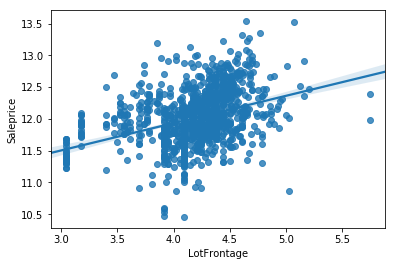

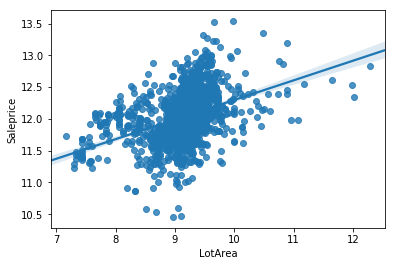

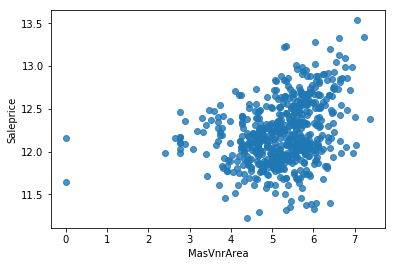

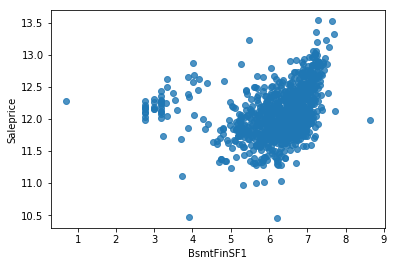

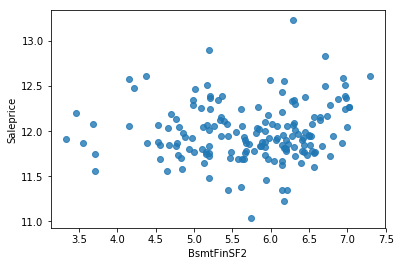

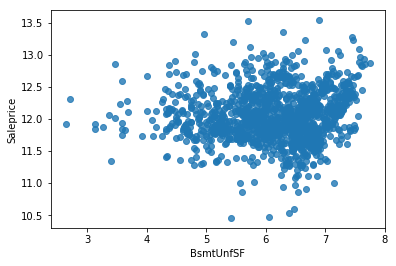

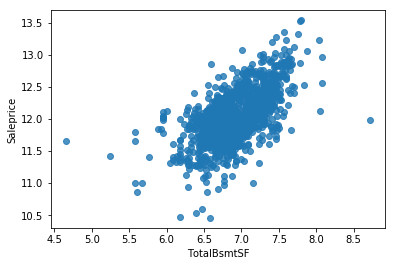

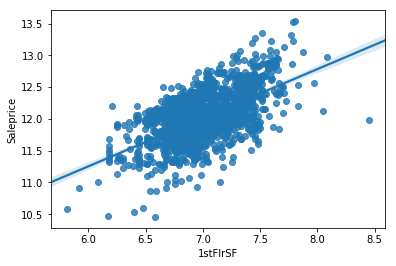

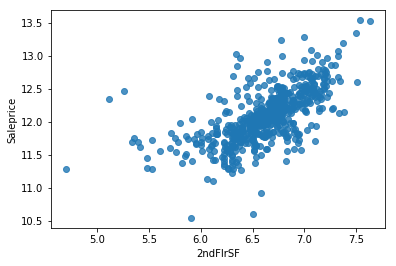

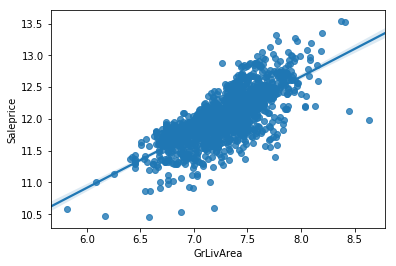

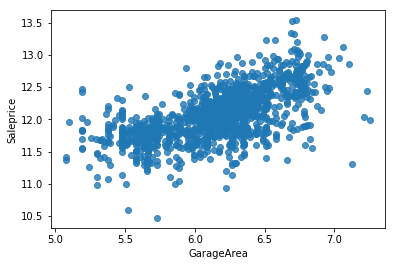

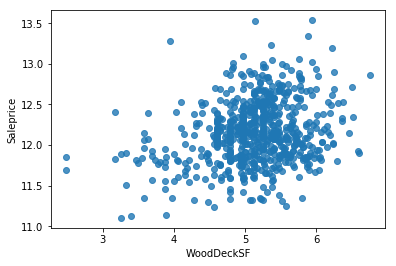

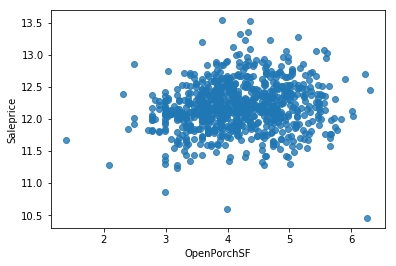

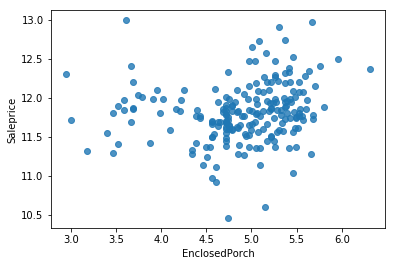

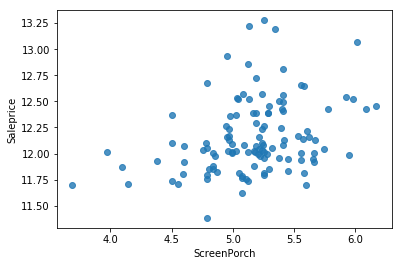

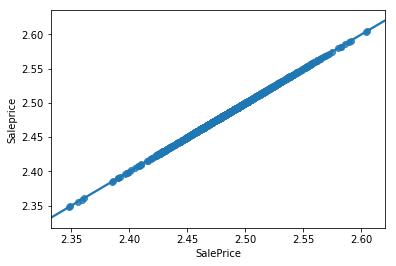

In [16]:
for feature in continous:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    sns.regplot(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Saleprice')
    plt.show()

In [17]:
df[['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


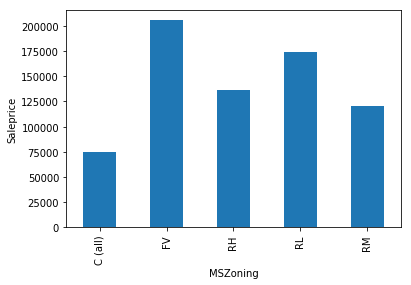

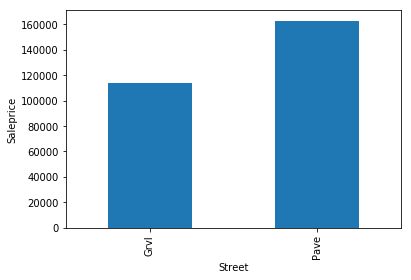

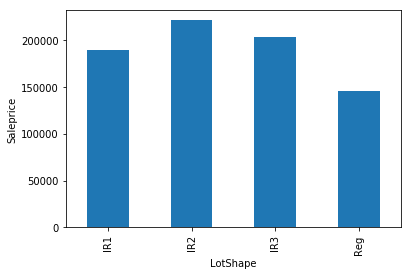

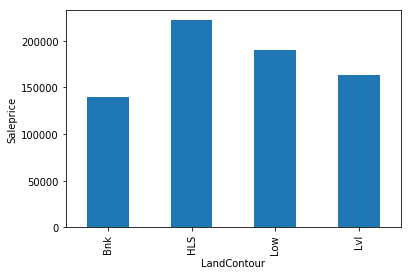

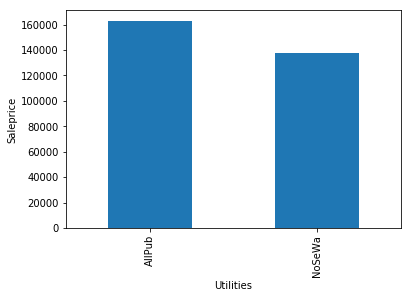

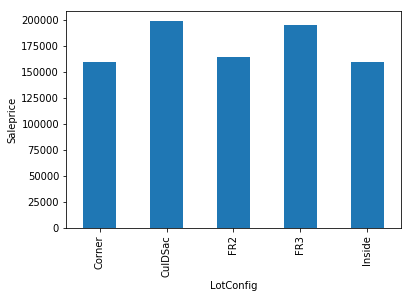

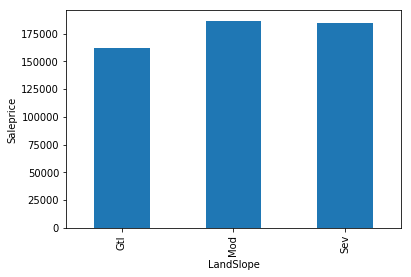

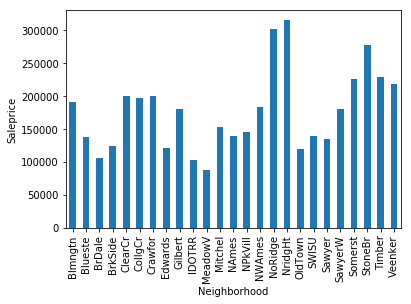

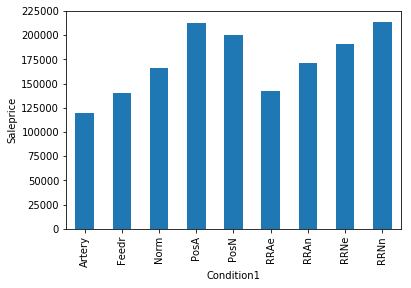

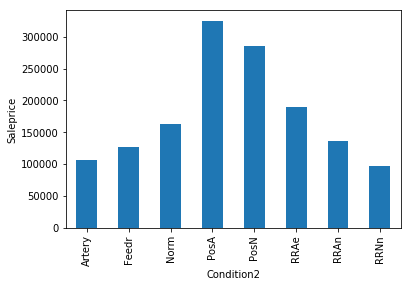

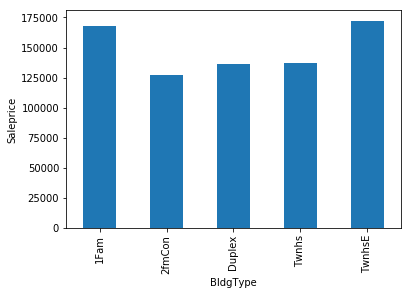

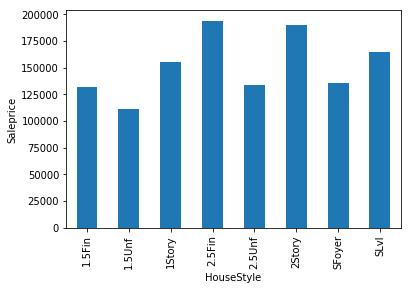

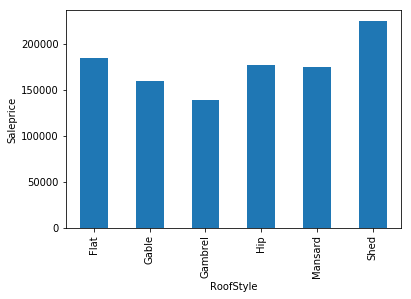

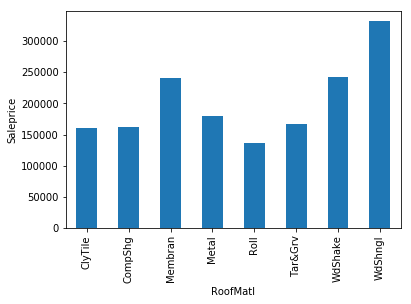

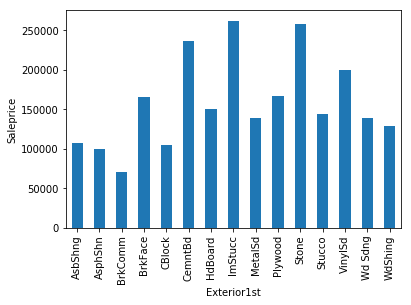

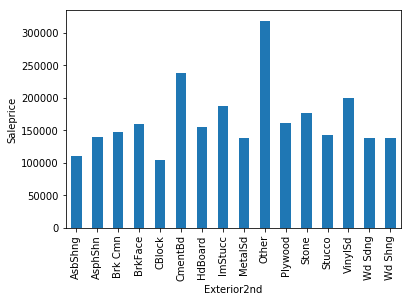

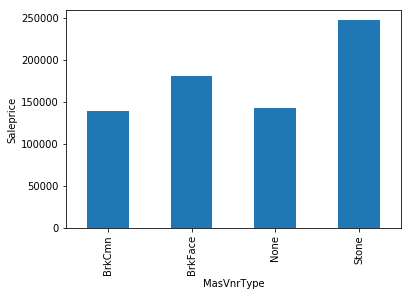

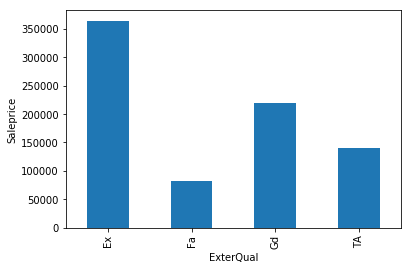

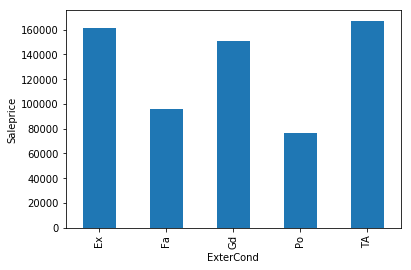

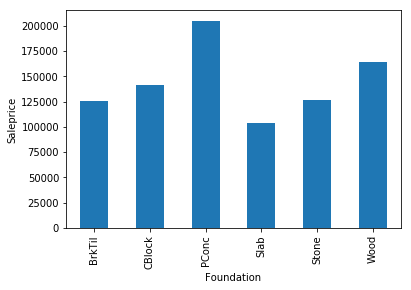

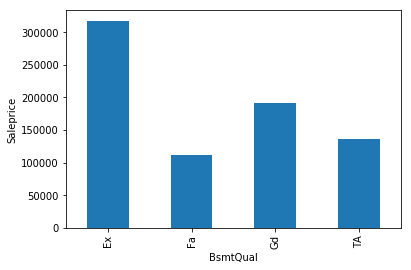

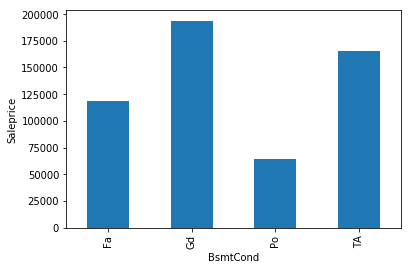

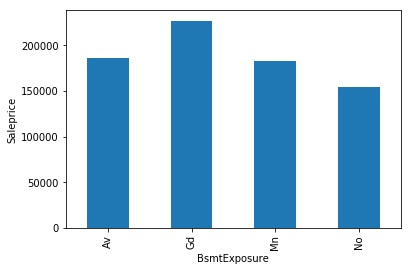

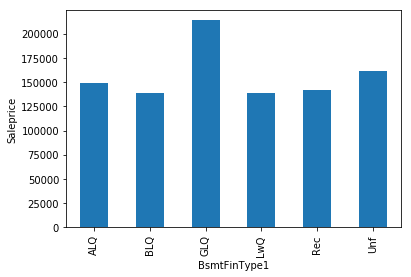

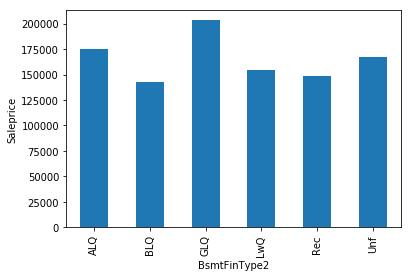

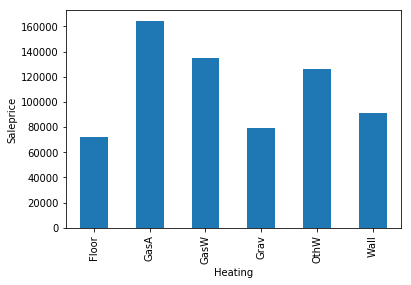

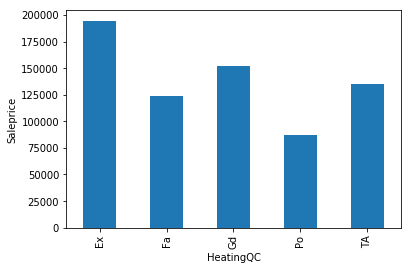

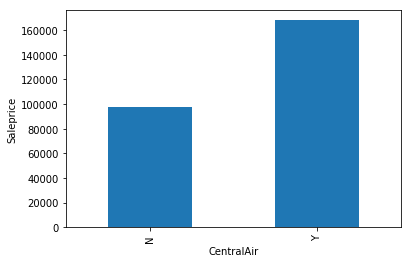

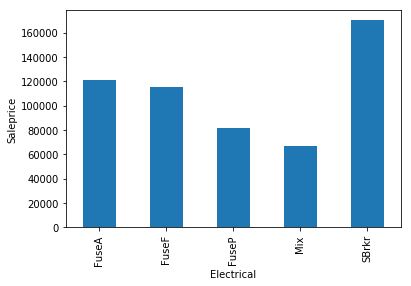

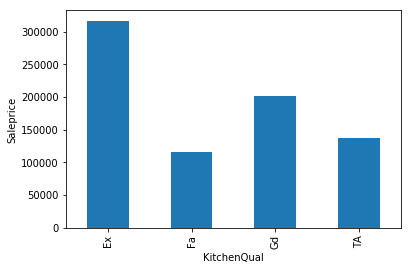

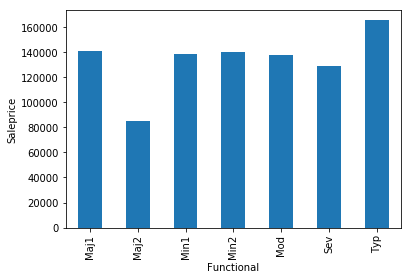

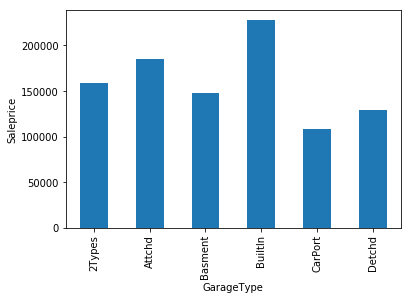

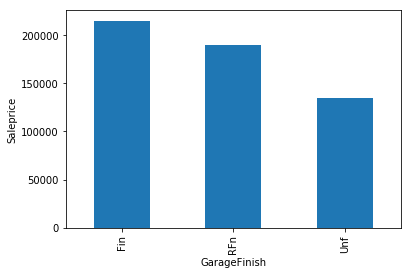

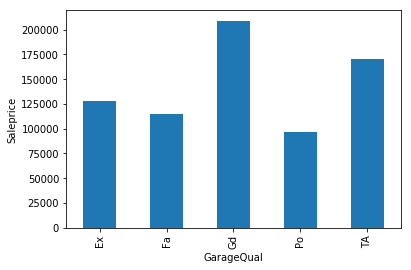

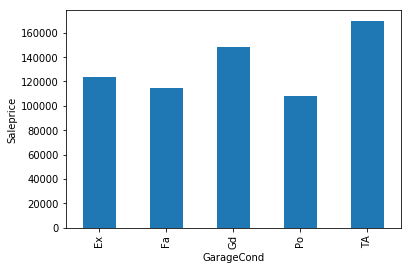

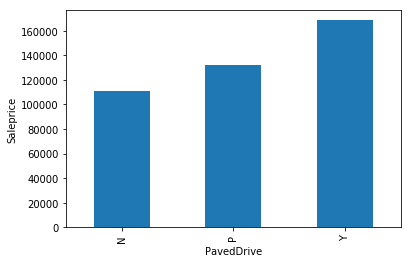

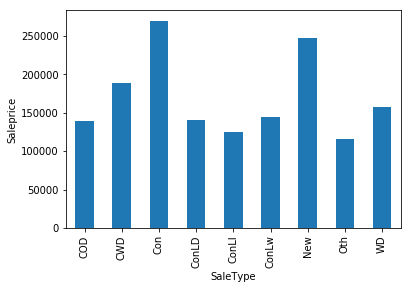

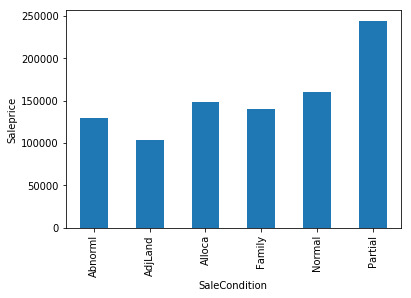

In [18]:
for feature in cat:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Saleprice')
    plt.show()

In [19]:
#Lets fill missing values for cat, for this what am doing is instead of replacing with mean, median i will create new class 'Missing'

In [20]:
features_with_nan_cat=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

In [21]:
def replace_cat(df,features_with_nan_cat):
    data=df.copy()
    data[features_with_nan_cat]=data[features_with_nan_cat].fillna('Missing')
    return data

df=replace_cat(df,features_with_nan_cat)

In [22]:
df[features_with_nan_cat].isna().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [23]:
numerical_with_nan=[feature for feature in df.columns if df[feature].isna().sum()>1 and df[feature].dtypes!='O']

In [24]:
for feature in numerical_with_nan:
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)

In [25]:
#Lets remove outliers...

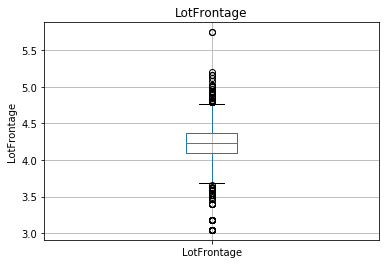

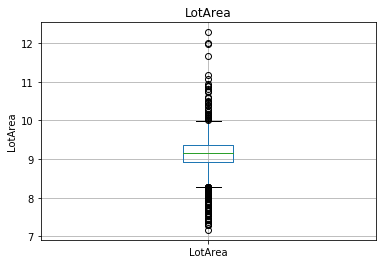

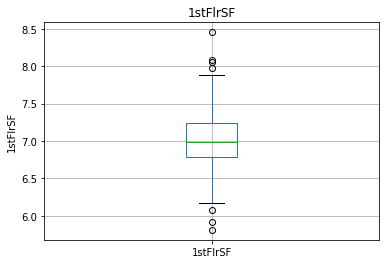

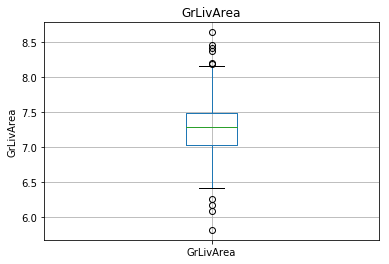

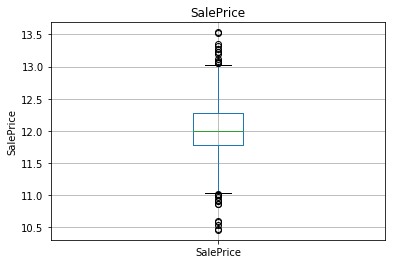

In [26]:
for feature in continous:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [27]:
for feature in continous:
    data=df.copy()
    data[feature]=np.log(data[feature])

In [28]:
#Lets remove outliers
def outlier(df):
    for i in df.describe().columns:
        q1=df.describe().at['25%',i]
        q3=df.describe().at['75%',i]
        iqr=q3-q1
        ltv=q1-1.5*iqr
        utv=q3+1.5*iqr
        x=np.array(df[feature])
        p=[]
        for j in x:
            if j<ltv or j>utv:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p


In [29]:
outlier(df)

In [30]:
#feature_scale=[feature for feature in df.columns if feature not in ['SalePrice']]

In [31]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,50.0,RL,69.0,9478.5,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6.0,5.0,1973.0,1994.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,383.5,Unf,0.0,477.5,991.5,GasA,Ex,Y,SBrkr,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,1980.0,RFn,2.0,480.0,TA,TA,Y,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,WD,Normal,208500.0
1,50.0,RL,69.0,9478.5,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,5.0,1973.0,1994.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,383.5,Unf,0.0,477.5,991.5,GasA,Ex,Y,SBrkr,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1980.0,RFn,2.0,480.0,TA,TA,Y,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,WD,Normal,181500.0


In [32]:
df['SalePrice'].min(),df['SalePrice'].max()   

(34900.0, 340000.0)

In [56]:
for feature in cat:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [57]:
temp_df

Index(['Abnorml', 'Family', 'Normal', 'Partial', 'Rare_var'], dtype='object', name='SaleCondition')

In [58]:
for feature in cat:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [59]:
feature_scale=[feature for feature in df.columns if feature not in 'SalePrice']

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [61]:
df=pd.concat([df['SalePrice'].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],axis=1)

In [62]:
df.head(2)

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500.0,0.0,0.75,0.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.636364,0.4,1.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.50,0.0,1.000000,1.0,1.0,0.75,0.75,0.25,1.000000,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.8,0.0,0.666667,0.0,0.0,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.75
1,181500.0,0.0,0.75,0.0,0.0,1.0,0.0,0.333333,1.0,0.5,0.0,0.454545,0.2,1.0,0.75,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.25,0.0,0.333333,1.0,0.5,0.75,0.75,1.00,0.666667,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.0,0.0,0.8,0.0,0.666667,0.0,0.0,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.75


In [63]:
#df=pd.concat([df['SalePrice'].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],axis=1)

In [64]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [65]:
df.head(1)

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,208500.0,0.0,0.75,0.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.636364,0.4,1.0,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,1.0,1.0,1.0,0.75,0.75,0.25,1.0,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.8,0.0,0.666667,0.0,0.0,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.75


In [66]:
data = pd.concat([df['SalePrice'].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [67]:
y=df[['SalePrice']]

In [68]:
x=df.drop('SalePrice',axis=1)

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [70]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [71]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [72]:
feature_sel_model.get_support()

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True])

In [73]:

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = x.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 74
selected features: 38


NameError: name 'sel_' is not defined

In [74]:
selected_feat

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [75]:
bestfeatures=SelectKBest(score_func=chi2,k=10) #select k best is used to get top score columns
fit=bestfeatures.fit(x,y)

In [76]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [77]:
featurescore=pd.concat([dfscores,dfcolumns],axis=1)
featurescore.columns=['scores','specs']

In [78]:
featurescore.sort_values(by='scores',ascending=False)

,scores,specs
19,514.839282,RoofStyle
20,454.043393,RoofMatl
9,385.164008,LandSlope
8,245.335246,LotConfig
5,220.586004,LotShape
25,176.271141,ExterQual
10,159.614359,Neighborhood
57,144.486774,GarageFinish
30,131.368457,BsmtExposure
22,126.522455,Exterior2nd


In [79]:
print(featurescore.nlargest(10,'scores'))

        scores         specs
19  514.839282     RoofStyle
20  454.043393      RoofMatl
9   385.164008     LandSlope
8   245.335246     LotConfig
5   220.586004      LotShape
25  176.271141     ExterQual
10  159.614359  Neighborhood
57  144.486774  GarageFinish
30  131.368457  BsmtExposure
22  126.522455   Exterior2nd


In [83]:
x=x[['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition']]

In [84]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()
ls=Lasso()
rd=Ridge()

In [85]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lr.predict(x)

array([[201496.38641557],
       [175670.98986011],
       [202636.15224912],
       ...,
       [199763.58485379],
       [168939.89784792],
       [150204.68793702]])

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [88]:
mse=mean_squared_error(y,lr.predict(x))

In [89]:
print(mse)

1476097129.3066585


In [90]:
mae=mean_absolute_error(y,lr.predict(x))

In [91]:
print(mae)

28470.39919807823


In [92]:
score=r2_score(y,lr.predict(x))
print(score)

0.5608587562644723


In [93]:
ls.fit(x,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
ls.predict(x)

array([201494.00310053, 175662.41374952, 202631.76830635, ...,
       199766.80525502, 168930.56731517, 150205.64575305])

In [95]:
score1=r2_score(y,ls.predict(x))
print(score1)

0.5608587153410187


In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rfc=RandomForestRegressor()

In [100]:
rfc.fit(x,y)
rfc.predict(x)

array([207540.97846315, 187550.        , 210406.07142857, ...,
       258350.        , 147187.5       , 141690.        ])

In [102]:
score2=r2_score(y,rfc.predict(x))
print(score2)

0.873915769353323


In [104]:
mse=mean_squared_error(y,rfc.predict(x))
print(mse)

423810274.1733921
